## Spacy
 spaCy is an open-source library for NLP in Python, designed for fast and efficient text processing.
 
Spacy is designed specifically for production use and helps you build applications that process and understand large volumes of text it can be used to build information extraction or natural language processing system or to preprocess text for deep learning.

Some of spacy's features works independently, others require statistical models to be loaded, which enables spacy to predict linguistic annotations- for example, whether a word is a verb or noun.

#### Core Features:

- Tokenization: Breaking text into words (tokens).
- Part-of-Speech Tagging: Identifying grammatical elements of each word (e.g., noun, verb, adjective).
- Named Entity Recognition (NER): Detecting and classifying entities like names, dates, locations, etc.
- Dependency Parsing: Understanding the grammatical structure of a sentence and how words relate to each other.
- Lemmatization: Reducing words to their base or root form.
- Text Classification: Categorizing text into predefined classes.

####  Spacy Models:
1. en_core_web_sm: A small, fast model with basic NLP features, ideal for quick tasks and smaller memory usage.

2. en_core_web_md: A medium-sized model with word vectors, offering better accuracy for tasks like word similarity and NER.

3. en_core_web_lg: A large model with more accurate word vectors and better performance on complex NLP tasks, but slower and memory-intensive.

4. xx_ent_wiki_sm: A multilingual model focused on entity recognition, suitable for tasks in multiple languages.

5. de_core_news_sm: A small German model for basic NLP tasks like tokenization and POS tagging.

6. es_core_news_sm: A small Spanish model for basic NLP tasks, including NER and dependency parsing.

7. fr_core_news_sm: A small French model for essential NLP tasks, like part-of-speech tagging and named entity recognition.

8. it_core_news_sm: A small Italian model for foundational NLP tasks, including tokenization and POS tagging.

9. nl_core_news_sm: A small Dutch model for basic NLP tasks such as text processing and entity recognition.

10. en_core_sci_md: A medium-sized model trained on scientific texts for specialized tasks like scientific entity recognition.

11. en_core_web_trf: A transformer-based model (like BERT), providing more accurate results at the cost of performance and memory usage.

## Text Preprocessing Steps Using spaCy

In [5]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

In [6]:
text = "Text preprocessing is an important step in NLP! It cleans and organizes data for better machine learning results."
doc = nlp(text)

### 1. Lowercasing and Uppercasing

In [32]:
upper = " ".join([token.text.upper() for token in doc])
print(upper)

TEXT PREPROCESSING IS AN IMPORTANT STEP IN NLP ! IT CLEANS AND ORGANIZES DATA FOR BETTER MACHINE LEARNING RESULTS .


In [34]:
lower = " ".join([token.text.lower() for token in doc])
print(lower)

text preprocessing is an important step in nlp ! it cleans and organizes data for better machine learning results .


### 2. Tokenization

In [39]:
tokens = [token.text for token in doc]
print(tokens)

['Text', 'preprocessing', 'is', 'an', 'important', 'step', 'in', 'NLP', '!', 'It', 'cleans', 'and', 'organizes', 'data', 'for', 'better', 'machine', 'learning', 'results', '.']


### 3. Stopword Removal

In [50]:
stopwords = [token.text for token in doc if not token.is_stop]
print(stopwords)

['Text', 'preprocessing', 'important', 'step', 'NLP', '!', 'cleans', 'organizes', 'data', 'better', 'machine', 'learning', 'results', '.']


### 4. Lemmatization 

In [53]:
lemma = [token.lemma_ for token in doc]
print(lemma)

['text', 'preprocessing', 'be', 'an', 'important', 'step', 'in', 'NLP', '!', 'it', 'clean', 'and', 'organize', 'datum', 'for', 'well', 'machine', 'learn', 'result', '.']


### 5. POS Tagging

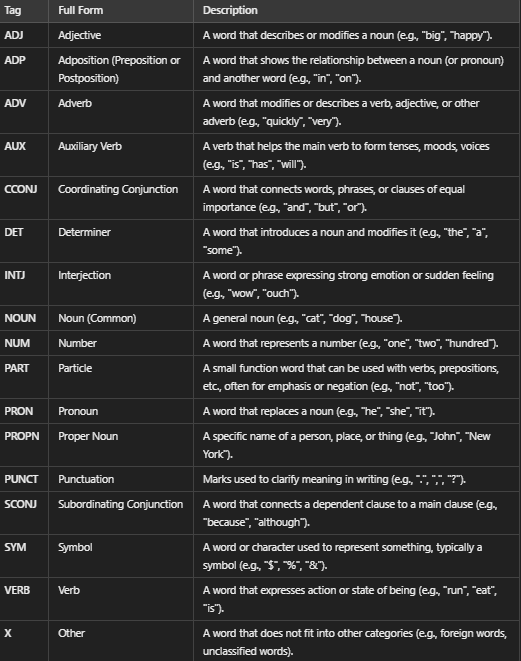

In [71]:
#POS: the simple part of speech
#TAG: the detailed part of speech tag

tags = [(token.text, token.pos_, token.tag_) for token in doc]
tags

[('Text', 'NOUN', 'NN'),
 ('preprocessing', 'NOUN', 'NN'),
 ('is', 'AUX', 'VBZ'),
 ('an', 'DET', 'DT'),
 ('important', 'ADJ', 'JJ'),
 ('step', 'NOUN', 'NN'),
 ('in', 'ADP', 'IN'),
 ('NLP', 'PROPN', 'NNP'),
 ('!', 'PUNCT', '.'),
 ('It', 'PRON', 'PRP'),
 ('cleans', 'VERB', 'VBZ'),
 ('and', 'CCONJ', 'CC'),
 ('organizes', 'VERB', 'VBZ'),
 ('data', 'NOUN', 'NNS'),
 ('for', 'ADP', 'IN'),
 ('better', 'ADJ', 'JJR'),
 ('machine', 'NOUN', 'NN'),
 ('learning', 'VERB', 'VBG'),
 ('results', 'NOUN', 'NNS'),
 ('.', 'PUNCT', '.')]

### 6. Named Entity Recognition (NER)
Identify and classify entities in text (e.g., names, dates, locations).

In [87]:
entity = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]
print(entity)

[('NLP', 'ORG', 43, 46)]


### Visualizing NER

In [92]:
from spacy import displacy

displacy.serve(doc, style="ent")

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### 7. Dependency Parsing
Analyze syntactic relationships between words in a sentence.

- Understands the grammatical structure of sentences.
- Useful for complex linguistic tasks.

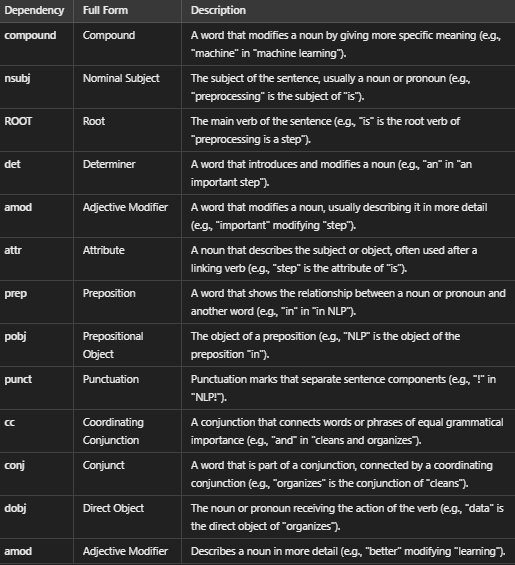

In [66]:
#Text: the original word
#Lemma: the base form of the word
#POS: the simple part of speech
#TAG: the detailed part of speech tag
#DEP: syntactic dependency, that is the relation between tokens

for token in doc:
    print(token.text, "-->", token.dep_, "-->", token.head.text)

Text --> compound --> preprocessing
preprocessing --> nsubj --> is
is --> ROOT --> is
an --> det --> step
important --> amod --> step
step --> attr --> is
in --> prep --> step
NLP --> pobj --> in
! --> punct --> is
It --> nsubj --> cleans
cleans --> ROOT --> cleans
and --> cc --> cleans
organizes --> conj --> cleans
data --> dobj --> organizes
for --> prep --> data
better --> amod --> learning
machine --> compound --> learning
learning --> compound --> results
results --> pobj --> for
. --> punct --> cleans


In [75]:
#Shape: the word shape- capitalization, punctuation, digits
#is alpha: is the token an alpha character? check if a token (word) consists only of alphabetic characters 
#(i.e., it contains no numbers, punctuation, or special symbols).
#is stop: is the token part of a stop list, that is the most common words of the language?

for token in doc:
    print(token.text, ":", token.shape_, ",", token.is_alpha, ",", token.is_stop)

Text : Xxxx , True , False
preprocessing : xxxx , True , False
is : xx , True , True
an : xx , True , True
important : xxxx , True , False
step : xxxx , True , False
in : xx , True , True
NLP : XXX , True , False
! : ! , False , False
It : Xx , True , True
cleans : xxxx , True , False
and : xxx , True , True
organizes : xxxx , True , False
data : xxxx , True , False
for : xxx , True , True
better : xxxx , True , False
machine : xxxx , True , False
learning : xxxx , True , False
results : xxxx , True , False
. : . , False , False


### 8. Word Vectors
#### What is a Vector in NLP?
In Natural Language Processing (NLP), a vector is a mathematical representation of words, sentences, or even entire documents. Words are converted into numerical form to be processed by machines. These vectors represent the meaning or context of the word in a way that a computer can understand.

##### For example:

- The word "dog" can be represented as a list of numbers, something like [0.45, -0.76, 0.23, 1.02, ...] in a vector space.
- Similarly, "cat" would have its own vector representation, but it would be different from "dog" (but they would be closer to each other than to, say, "apple" in vector space).

#### Explanation of the Terms:
1. token.has_vector:
This checks if the word has a pre-trained vector. Not all words in a model have vectors (especially rare or misspelled words). If the word has a vector, this will return True.

- Example:
If you're using a word like "dog", a pre-trained model (like Word2Vec or GloVe) would likely have a vector for it, so token.has_vector would return True.

2. token.vector_norm:
This measures the size (or magnitude) of the word vector. It's like measuring the length of a line or vector in geometry. It tells you how "strong" the word's representation is in the model.

- Example:
If the vector of "dog" is [0.45, -0.76, 0.23, 1.02], the vector norm tells you how large this vector is compared to other vectors.

3. token.is_oov:
This checks if the word is out of vocabulary. If the word does not exist in the pre-trained word embeddings (the word vector model), it’s considered OOV.

- Example:
If you type in a new or rare word like "fluffify" (that the model has never seen before), token.is_oov would return True, indicating it's out of vocabulary.

In [7]:
#Vector norm: The L2 norm of the token's vector (the square root of the sum of the values squared)
#has vector: Does the token have a vector representation?
#OOV: Out-of-vocabulary

for token in doc:
    print(token.text, ":", token.has_vector, ",", token.vector_norm, ",", token.is_oov)

Text : True , 6.439239 , True
preprocessing : True , 6.507853 , True
is : True , 6.1588526 , True
an : True , 6.777349 , True
important : True , 7.079054 , True
step : True , 4.762628 , True
in : True , 6.3189692 , True
NLP : True , 7.2437887 , True
! : True , 8.496764 , True
It : True , 7.714966 , True
cleans : True , 7.100555 , True
and : True , 9.183833 , True
organizes : True , 7.492111 , True
data : True , 5.1852036 , True
for : True , 6.5232377 , True
better : True , 7.6450453 , True
machine : True , 6.0222054 , True
learning : True , 6.8484397 , True
results : True , 5.5634146 , True
. : True , 9.957648 , True


Spacy's small models (all the packages end with sm) don't ship with the word vectors, and only Include context sensitive tensors. You can still use the similarity to compare documents, tokens and spans- but result won't be as good and individual tokens wont have any vectors assigned so in order to use real world vectors you need to download a larger model.

Models that come with built in word vectors make them available as the token.vector attribute. doc.vector and span.vector will default to an average of their token vector.
You can also check if the token has a vector assigned and get the L2 norm which can be used to normalise vectors.

In [27]:
# Another example
#python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")
text = "Lion bear apple banana"
doc = nlp(text)

for token in doc:
    print(token.text, ":", token.has_vector, ",", token.vector_norm, ",", token.is_oov)

Lion : True , 6.6788154 , False
bear : True , 7.2436275 , False
apple : True , 6.895898 , False
banana : True , 6.895898 , False


### Similarity
In spaCy, similarity refers to measuring how similar two words, phrases, or documents are to each other based on their vector representations. SpaCy uses pre-trained word vectors to compute similarity scores, where a higher score indicates more similarity.

In [31]:
for token11 in doc:
    for token13 in doc:
        print(token11.text, ",", token11.text, ",", token11.similarity(token13))

Lion , Lion , 1.0
Lion , Lion , 0.42525938153266907
Lion , Lion , 0.25588127970695496
Lion , Lion , 0.25588127970695496
bear , bear , 0.42525938153266907
bear , bear , 1.0
bear , bear , 0.2901766002178192
bear , bear , 0.2901766002178192
apple , apple , 0.25588127970695496
apple , apple , 0.2901766002178192
apple , apple , 1.0
apple , apple , 1.0
banana , banana , 0.25588127970695496
banana , banana , 0.2901766002178192
banana , banana , 1.0
banana , banana , 1.0
